In [31]:
import tensorflow as tf

In [169]:
def cnn(image):
    image_shape = (384,1280,3)
    mu = 0
    sigma = 0.05
    
    # VALID Padding, the output height and width are computed as:
    #out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))
    
    conv1_output_depth = 64
    conv1_w = tf.Variable(tf.truncated_normal(shape=(7,7,3,conv1_output_depth),mean=mu,stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(conv1_output_depth))
    padded_input = tf.pad(image,[[0,0],[3,3],[3,3],[0,0]])
    conv1 = tf.nn.conv2d(padded_input,conv1_w,strides=[1,2,2,1],padding='VALID') + conv1_b
    
    conv1 = tf.nn.relu(conv1)
    
    conv2_output_depth = 128
    conv2_w = tf.Variable(tf.truncated_normal(shape=(5,5,conv1_output_depth,conv2_output_depth),mean=mu,stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(conv2_output_depth))
    padded_input = tf.pad(conv1,[[0,0],[2,2],[2,2],[0,0]])
    conv2 = tf.nn.conv2d(padded_input,conv2_w,strides=[1,2,2,1],padding='VALID') + conv2_b

    conv2 = tf.nn.relu(conv2)

    conv3_output_depth = 256
    conv3_w = tf.Variable(tf.truncated_normal(shape=(5,5,conv2_output_depth,conv3_output_depth),mean=mu,stddev=sigma))
    conv3_b = tf.Variable(tf.zeros(conv3_output_depth))
    padded_input = tf.pad(conv2,[[0,0],[2,2],[2,2],[0,0]])
    conv3 = tf.nn.conv2d(padded_input,conv3_w,strides=[1,2,2,1],padding='VALID') + conv3_b
                      
    conv3 = tf.nn.relu(conv3)
            
    conv3_1_output_depth = 256
    conv3_1_w = tf.Variable(tf.truncated_normal(shape=(3,3,conv3_output_depth,conv3_1_output_depth),mean=mu,stddev=sigma))
    conv3_1_b = tf.Variable(tf.zeros(conv3_1_output_depth))
    padded_input = tf.pad(conv3,[[0,0],[1,1],[1,1],[0,0]])
    conv3_1 = tf.nn.conv2d(padded_input,conv3_1_w,strides=[1,1,1,1],padding='VALID') + conv3_1_b

    conv3_1 = tf.nn.relu(conv3_1)

    conv4_output_depth = 512
    conv4_w = tf.Variable(tf.truncated_normal(shape=(3,3,conv3_1_output_depth,conv4_output_depth),mean=mu,stddev=sigma))
    conv4_b = tf.Variable(tf.zeros(conv4_output_depth))
    padded_input = tf.pad(conv3_1,[[0,0],[1,1],[1,1],[0,0]]) 
    conv4 = tf.nn.conv2d(padded_input,conv4_w,strides=[1,2,2,1],padding='VALID') + conv4_b

    conv4 = tf.nn.relu(conv4)

    conv4_1_output_depth = 512
    conv4_1_w = tf.Variable(tf.truncated_normal(shape=(3,3,conv4_output_depth,conv4_1_output_depth),mean=mu,stddev=sigma))
    conv4_1_b = tf.Variable(tf.zeros(conv4_1_output_depth))
    padded_input = tf.pad(conv4,[[0,0],[1,1],[1,1],[0,0]])
    conv4_1 = tf.nn.conv2d(padded_input,conv4_1_w,strides=[1,1,1,1],padding='VALID') + conv4_1_b
    
    conv4_1 = tf.nn.relu(conv4_1)
    
    conv5_output_depth = 512
    conv5_w = tf.Variable(tf.truncated_normal(shape=(3,3,conv4_1_output_depth,conv5_output_depth),mean=mu,stddev=sigma))
    conv5_b = tf.Variable(tf.zeros(conv5_output_depth))
    padded_input = tf.pad(conv4_1,[[0,0],[1,1],[1,1],[0,0]])
    conv5 = tf.nn.conv2d(padded_input,conv5_w,strides=[1,2,2,1],padding='VALID') + conv5_b
    
    conv5 = tf.nn.relu(conv5)
    
    conv5_1_output_depth = 512
    conv5_1_w = tf.Variable(tf.truncated_normal(shape=(3,3,conv5_output_depth,conv5_1_output_depth),mean=mu,stddev=sigma))
    conv5_1_b = tf.Variable(tf.zeros(conv5_1_output_depth))
    padded_input = tf.pad(conv5,[[0,0],[1,1],[1,1],[0,0]])
    conv5_1 = tf.nn.conv2d(padded_input,conv5_1_w,strides=[1,1,1,1],padding='VALID') + conv5_1_b
    
    conv5_1 = tf.nn.relu(conv5_1)
    
    conv6_output_depth = 1024
    conv6_w = tf.Variable(tf.truncated_normal(shape=(3,3,conv5_1_output_depth,conv6_output_depth),mean=mu,stddev=sigma))
    conv6_b = tf.Variable(tf.zeros(conv6_output_depth))
    padded_input = tf.pad(conv5_1,[[0,0],[1,1],[1,1],[0,0]])
    conv6 = tf.nn.conv2d(padded_input,conv6_w,strides=[1,2,2,1],padding='VALID') + conv6_b
    
    return conv6

In [170]:
def rnn(x):
    hidden_state_num = 1000
    rnn_cell = rnn.BasicLSTMCell(hidden_state_num)
    outputs,states = rnn.static_rnn(rnn_cell,x)

In [171]:
image_shape = (384,1280,3)
X = tf.placeholder(tf.float32,(None,image_shape[0],image_shape[1],image_shape[2]))
features = cnn(X) 

In [172]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    result = sess.run(features,feed_dict={X:image})
    print(result.shape)

(1, 6, 20, 1024)


In [23]:
import os
basedir = '/home/skye/dataset'
sequence = '04'
image_dir = os.path.join(basedir, 'sequences', sequence,'image_2/')
files = os.listdir(image_dir)

In [59]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
% matplotlib inline
images = []
for filename in files:
    #print(filename)
    image = mpimg.imread(image_dir + filename)
    
    images.append(image)
    

float32


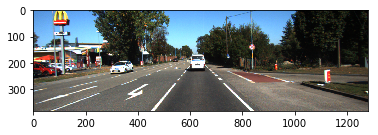

In [74]:
image = mpimg.imread("0000000.png")
plt.imshow(image)
image = image.reshape((1,384,1280,3))